# Задача 2

Рещаем нелинейное одномерное уравнение переноса: 
$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0
$$
Решение $u(t,x)$ рассматриваем на ограниченном отрезке $[a,b]$.

С целью минимизации влияния границ, будем задавать постоянные значения функции на границах интервала.

Начальную функцию $u(0,x)$ будем задавать в виде:
$$
u(0,x) = 
\begin{cases}
u_1, &x < x_1\\
u_1 + \frac{u_2 - u_1}{x_2 - x_1} (x - x_1), &x_1 < x < x_2\\
u_2, &x > x_2
\end{cases}
$$

Точки особенностей $x_1, x_2 \in [a,b]$, значение слева больше значения справа: $u_1 > u_2$

In [2]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


def foo1(x, x1, x2):  # начальная функция
    u1 = 1
    u2 = 0
    if x < x1:
        return u1
    elif x > x2:
        return u2
    else:
        return u1 + (u2 - u1) * (x - x1) / (x2 - x1)
    

def start_bound_foo1(a, b, x1, x2, d_x, t, d_t):
    X = np.arange(a, b + d_x, d_x)  # сделали сетку по x
    T = np.arange(0, t + d_t, d_t)  # сделали сетку по t
    U = np.zeros((len(T), len(X)))  # сделали массив, куда будем складывать решение

    for i in range(len(X)):  # сделали НУ
        U[0][i] = foo1(X[i], x1, x2)

    for j in range(len(T)):  # сделали ГУ
        U[j][0] = foo1(a, x1, x2)
        U[j][len(X) - 1] = foo1(b, x1, x2)
    return X, T, U   


def F(u):
    return u ** 2 / 2


a = 0  # условия
b = 1
x1 = 0.2
x2 = 0.5
d_x = 0.001
d_t = 0.0005
t = 1  # максимальное время

# моменты времени, в которые смотрим решения
t1 = 0
t2 = 0.3
t3 = 0.35
t4 = 0.25
t_lim1 = 0.5
t_lim2 = 0.3

N_t = int(t / 0.01)  # всего шагов по времени
N1 = int(t1 / d_t)
N2 = int(t2 / d_t)
N3 = int(t3 / d_t)
N4 = int(t4 / d_t)
N_lim1 = int(t_lim1 / d_t)
N_lim2 = int(t_lim2 / d_t)

X, T, U = start_bound_foo1(a, b, x1, x2, d_x, t, d_t)

Решаем с помощью схемы Лакса

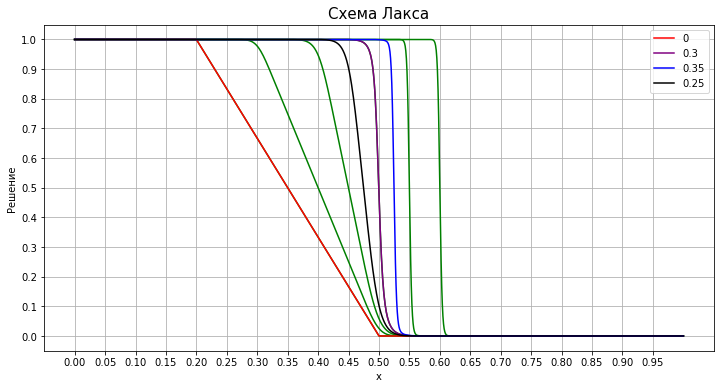

In [3]:
def Laks(X, U, T, d_x, d_t):
    kur = d_t / d_x
    for t_j in range(len(T) - 1):
        for x_i in range(1, len(X) - 1):
            U[t_j + 1][x_i] = 0.5 * (U[t_j][x_i + 1] + U[t_j][x_i - 1]) - kur / 2 * (F(U[t_j][x_i + 1]) - F(U[t_j][x_i - 1]))
    return U


U1 = Laks(X, U, T, d_x, d_t)
fig1 = plt.figure(figsize=(12, 6))
plt.title("Схема Лакса", fontsize=15)
plt.xlabel("x")
plt.ylabel("Решение")
ax = fig1.gca()
ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_yticks(np.arange(0, 1.5, 0.1))

t_i = 0
while t_i <= t_lim1:
    N_i = int(t_i / d_t)
    plt.plot(X, U1[N_i], "-", color='green')  #, label=round(t_i, 2))
    t_i += 0.1

plt.plot(X, U1[N1], "-", color='red', label = t1)
plt.plot(X, U1[N2], "-", color='purple', label = t2)
plt.plot(X, U1[N3], "-", color='blue', label = t3)
plt.plot(X, U1[N4], "-", color='black', label = t4)

plt.grid()
plt.legend()
plt.show()

Решаем с помощью схемы Мак-Кормака

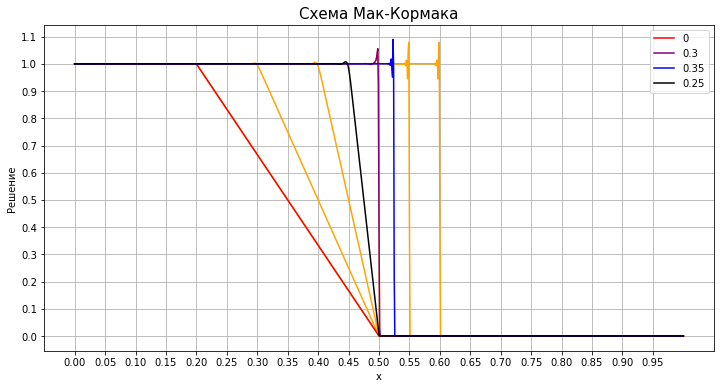

In [4]:
def MacCormack(X, U, T, d_x, d_t):  # t = 0.29-0.3
    kur = d_t / d_x
    for t_j in range(len(T) - 1):
        x_i = 0
        U_pr_prev = U[t_j][x_i] - kur / 2 * ((U[t_j][x_i + 1]) ** 2 - (U[t_j][x_i]) ** 2)
        for x_i in range(1, len(X) - 1):
            U_pr = U[t_j][x_i] - kur / 2 * (U[t_j][x_i + 1] ** 2 - U[t_j][x_i] ** 2)
            U[t_j + 1][x_i] = 0.5 * (U[t_j][x_i] + U_pr) - kur / 4 * (U_pr ** 2 - U_pr_prev ** 2)
            U_pr_prev = U_pr
    return U


U2 = MacCormack(X, U, T, d_x, d_t)
fig2 = plt.figure(figsize=(12, 6))
ax = fig2.gca()
ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_yticks(np.arange(0, 1.5, 0.1))
plt.title("Схема Мак-Кормака", fontsize=15)
plt.xlabel("x")
plt.ylabel("Решение")


t_i = 0
while t_i <= t_lim1:
    N_i = int(t_i / d_t)
    plt.plot(X, U2[N_i], "-", color='orange')  #, label = round(t_i, 2))
    t_i += 0.1
plt.plot(X, U2[N1], "-", color='red', label = t1)
plt.plot(X, U2[N2], "-", color='purple', label = t2)
plt.plot(X, U2[N3], "-", color='blue', label = t3)
plt.plot(X, U2[N4], "-", color='black', label = t4)

plt.grid()
plt.legend()
plt.show()

Теперь рассчитываем движение уединенной волны. Начальная функция задается в виде одиночного импульса:
$$
u(0, x) = exp(-\frac{(x - x_0)^2}{d^2})
$$

In [5]:
def foo2(x, x0, d):
    return math.exp(-(x - x0) ** 2 / d ** 2)


def start_bound_foo2(a, b, x0, d, d_x, t, d_t):
    X = np.arange(a, b + d_x, d_x) # сделали сетку по x
    T = np.arange(0, t + d_t, d_t) # сделали сетку по t
    U = np.zeros((len(T), len(X))) # сделали массив, куда будем складывать решение

    for i in range(len(X)):  # сделали НУ
        U[0][i] = foo2(X[i], x0, d)

    for j in range(len(T)):  # сделали ГУ
        U[j][0] = foo2(a, x0, d)
        U[j][len(X) - 1] = foo2(b, x0, d)
    return X, T, U


x0 = 0.5
d = 0.2


X, T, U = start_bound_foo2(a, b, x0, d, d_x, t, d_t)

Решаем с помощью схемы Лакса

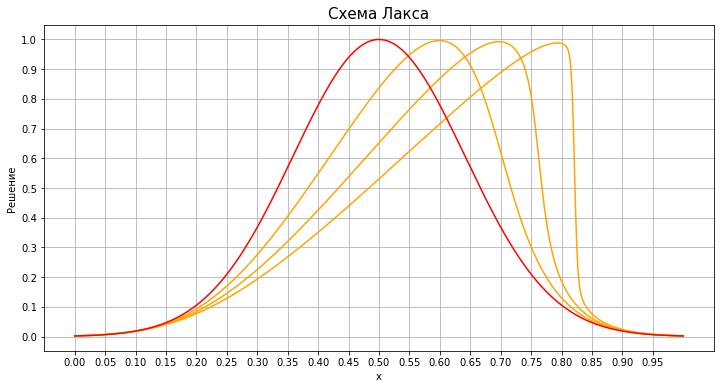

In [6]:
U3 = Laks(X, U, T, d_x, d_t)
fig3 = plt.figure(figsize=(12, 6))
plt.title("Схема Лакса", fontsize=15)
plt.xlabel("x")
plt.ylabel("Решение")
ax = fig3.gca()
ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_yticks(np.arange(0, 1.5, 0.1))

t_i = 0
while t_i <= t_lim2:
    t_i += 0.1
    N_i = int(t_i / d_t)
    plt.plot(X, U3[N_i], "-", color='orange', label=round(t_i, 2))
plt.plot(X, U3[N1], "-", color='red', label=t1)

plt.grid()
# plt.legend()
plt.show()

Решаем с помощью схемы Мак-Кормака

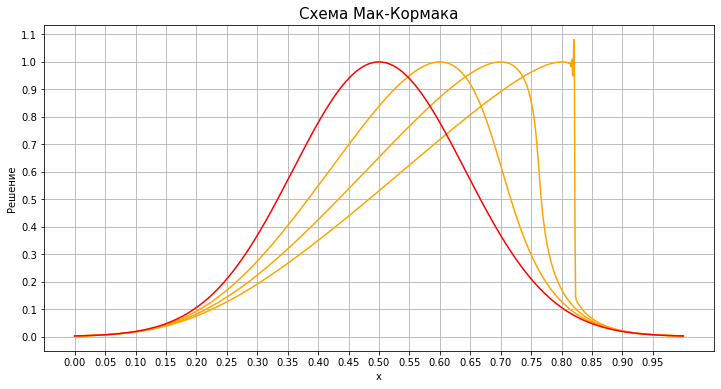

In [7]:
U4 = MacCormack(X, U, T, d_x, d_t)
fig4 = plt.figure(figsize=(12, 6))
ax = fig4.gca()
ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_yticks(np.arange(0, 1.5, 0.1))
plt.title("Схема Мак-Кормака", fontsize=15)
plt.xlabel("x")
plt.ylabel("Решение")


t_i = 0
while t_i <= t_lim2:
    t_i += 0.1
    N_i = int(t_i / d_t)
    plt.plot(X, U4[N_i], "-", color='orange') #, label=round(t_i, 2))
plt.plot(X, U4[N1], "-", color='red', label=t1)
'''plt.plot(X, U4[N2], "-", color='purple', label=t2)
plt.plot(X, U4[N3], "-", color='blue', label=t3)
plt.plot(X, U4[N4], "-", color='black', label=t4)'''

plt.grid()
#plt.legend()
plt.show()

Сравнение схем Лакса и Мак-Кормака

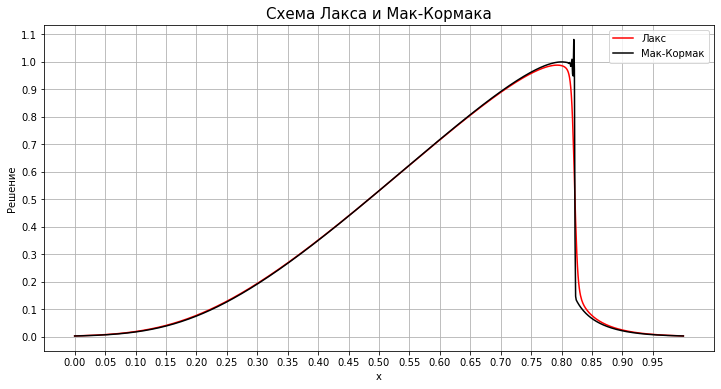

In [8]:
U3 = Laks(X, U, T, d_x, d_t)
fig5 = plt.figure(figsize=(12, 6))
ax = fig5.gca()
ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_yticks(np.arange(0, 1.5, 0.1))
plt.title("Схема Лакса и Мак-Кормака", fontsize=15)
plt.xlabel("x")
plt.ylabel("Решение")
plt.plot(X, U3[N_lim2], "-", color='red', label='Лакс')
U4 = MacCormack(X, U, T, d_x, d_t)
plt.plot(X, U4[N_lim2], "-", color='black', label='Мак-Кормак')

plt.grid()
plt.legend()
plt.show()